In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhwang1","key":"6f80ce7088b59bada7f5c3746ca60dbe"}'}

In [0]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d lantian773030/pokemonclassification

100% 416M/417M [00:02<00:00, 168MB/s]
100% 417M/417M [00:02<00:00, 149MB/s]


In [0]:
#Unzip the dataset downloaded from kaggle
from zipfile import ZipFile
with ZipFile('pokemonclassification.zip', 'r') as zipObj:
   # Extract all the contents of zip file in the data directory
   zipObj.extractall('./data/')

In [0]:
#initialize model
(h,w,d) = (96,96,3)
classes = 150
model = Sequential()
inputShape = (h,w,d)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (d,h,w)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#softmax
model.add(Dense(classes))
model.add(Activation("softmax"))
#model.summary()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)       

In [0]:
import matplotlib.pyplot as plt
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import random
import cv2
import os

In [0]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)
# initialize the data and labels
data = []
labels = []
# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
imgPaths = sorted(list(paths.list_images(os.path.join(os.getcwd(),'data'))))
random.seed(42)
random.shuffle(imgPaths)

[INFO] loading images...


In [0]:
for imgPath in imgPaths:
    print("read : ",imgPath)
    image = cv2.imread(imgPath)
    image = cv2.resize(image, (96,96))
    label = imgPath.split(os.path.sep)[-2]
    print(label)
    
    data.append(image)
    labels.append(label)



Streaming output truncated to the last 5000 lines.
Krabby
read :  /content/data/PokemonData/Gyarados/4310eb5465b94f9ebaf721724cdb9b02.jpg
Gyarados
read :  /content/data/PokemonData/Alakazam/e4f9bb3159924d988611bd835ef5ffa5.jpg
Alakazam
read :  /content/data/PokemonData/Jigglypuff/474148cb42f649b6b3e740e05b555262.jpg
Jigglypuff
read :  /content/data/PokemonData/Rapidash/e0bfad1e6a8c4c45aab17557f39458c9.jpg
Rapidash
read :  /content/data/PokemonData/Spearow/1af3140f459c4fdc85c330b7ef73d85c.jpg
Spearow
read :  /content/data/PokemonData/Mewtwo/8ab083905ea846efa0e1a3ff500e55a5.jpg
Mewtwo
read :  /content/data/PokemonData/Golduck/86aa9e1120664859bbaf76b1840ed0e7.jpg
Golduck
read :  /content/data/PokemonData/Snorlax/7eece93641f74fa292c60451a1e7bf78.jpg
Snorlax
read :  /content/data/PokemonData/Voltorb/cc0686de73d7433e8a9de2686dd92f00.jpg
Voltorb
read :  /content/data/PokemonData/Aerodactyl/91a6d66ed71e45c4a7a5a7917ab44666.jpg
Aerodactyl
read :  /content/data/PokemonData/Victreebel/70b06bc5864

In [0]:
data = np.array(data, dtype="float")/255.0
print("[INFO] data matrix: {:.2f}MB".format(data.nbytes / (1024*1000.0)))

lb = LabelBinarizer()
print(lb)
labels = lb.fit_transform(labels)
classes = len(lb.classes_)
print(classes)
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

[INFO] data matrix: 1473.12MB
LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
150


[INFO] serializing label binarizer...


In [0]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")
aug

In [0]:
from keras.optimizers import Adam
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [0]:
print("[INFO] training network...")
hh = model.fit_generator(aug.flow(trainX, trainY, batch_size=20),validation_data=(testX,testY),steps_per_epoch=len(trainX)//20,epochs=EPOCHS)

[INFO] training network...
Epoch 1/100
272/272 [==============================] - 204s 750ms/step - loss: 4.7854 - accuracy: 0.0666 - val_loss: 4.9372 - val_accuracy: 0.0836
Epoch 2/100
272/272 [==============================] - 205s 752ms/step - loss: 4.0813 - accuracy: 0.1448 - val_loss: 3.3977 - val_accuracy: 0.2346
Epoch 3/100
272/272 [==============================] - 208s 764ms/step - loss: 3.6527 - accuracy: 0.1992 - val_loss: 5.3006 - val_accuracy: 0.1774
Epoch 4/100
272/272 [==============================] - 200s 736ms/step - loss: 3.1362 - accuracy: 0.2747 - val_loss: 2.7010 - val_accuracy: 0.3570
Epoch 5/100
272/272 [==============================] - 206s 757ms/step - loss: 2.8279 - accuracy: 0.3127 - val_loss: 2.3013 - val_accuracy: 0.4355
Epoch 6/100
272/272 [==============================] - 209s 770ms/step - loss: 2.4736 - accuracy: 0.3782 - val_loss: 2.0368 - val_accuracy: 0.4912
Epoch 7/100
272/272 [==============================] - 206s 759ms/step - loss: 2.2141 - acc

In [0]:
model.save('cnn_11249_14042020_forcolab.h5')

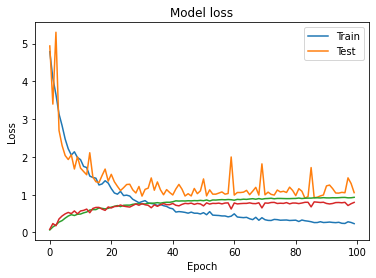

In [0]:
import matplotlib.pyplot as plt
plt.plot(hh.history['loss'])
plt.plot(hh.history['val_loss'])

#plt.xticks(range(20))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()


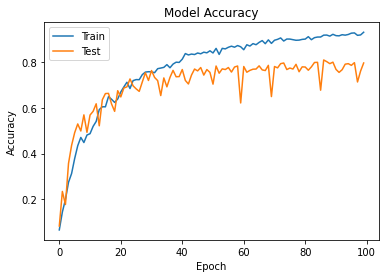

In [0]:
plt.plot(hh.history['accuracy'])
plt.plot(hh.history['val_accuracy'])
plt.legend(['Train','Test'], loc='upper left')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [0]:
print("[INFO] training network...")
hh1 = model.fit_generator(aug.flow(trainX, trainY, batch_size=20),validation_data=(testX,testY),steps_per_epoch=len(trainX)//20,epochs=80)

176/272 [==================>...........] - ETA: 1:08 - loss: 0.2135 - accuracy: 0.9346

KeyboardInterrupt: ignored

In [0]:
# Test image from outside
img_test = cv2.imread('pikachu.png') # any file read
img_test = cv2.resize(img_test, IMAGE_DIMS[:2])
img_test = np.expand_dims(img_test, axis=0)
print(img_test.shape)
predx = model.predict(img_test)
idx = np.argmax(predx[0])
print(predx,idx)

(1, 96, 96, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]] 102


'Pikachu'

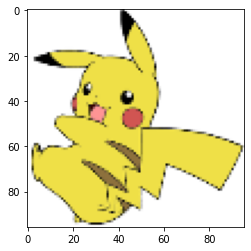

In [0]:
lb1 = pickle.loads(open('aa' ,"rb").read())
plt.imshow(img_test[0][:,:,::-1])
lb1.classes_[idx]

array(['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok',
       'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise',
       'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard',
       'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster',
       'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo',
       'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee',
       'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor',
       'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude',
       'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler',
       'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan',
       'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon',
       'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan',
       'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp',
       'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton',
     